# Test-train split, MSE

So far I have introduced two statistical techniques **simple linear regression**, and **k-nearest-neighbor** to tackle regression problem. In this notebook, we will compare the performance of the two using **MSE**.

First, however, we have to talk about splitting data. So far we have used whole data set to train the statistical model. This is good for finding as accurate of a model as possible. However, it has a drawback: ``we do not know how will the model perform on unfamiliar data.`` 

For instance considering k-nearest-neigbors, it seem that $k=1$ would be the best model. The model has no error on the data, or does it? How would the model perform in a novel setting?

## Test-train split

To answer these quesations, the most straigtforward solution would be to split the data into two sets: **training set**, and **testing set**. The training set will be used to fit the model - approximate coefficient in the case of linear regression. Then the testing set will be used to evaluate model's performance. However, how exactly do we measure model's performance? 


*As a rule of thumb we will use $80$% of data on training and $20$% for testing.
## MSE

The **Mean squared error** is a metric that can be used to evaluate performance of a model on regression problem. It is calculated as follows:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y}_i)^2,
$$
where $n$ is the number of data points in the set, and $\hat{y}_i$ is the prediction of the statistical model.

## Code

Let's start by improting required libraries

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Import statistical models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Import function that splits the data
from sklearn.model_selection import train_test_split

# Import MSE metric
from sklearn.metrics import mean_squared_error 

Read data.

In [14]:
df = pd.read_csv("../data/Credit.csv")

X = df[['Income']]
y = df['Limit']
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


Now, we split data into training and testing sets with ``random_state=1`` which ensures that data will be split the same.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Next we train linear regression and k-nearest neighbor on training data and plot it.

/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


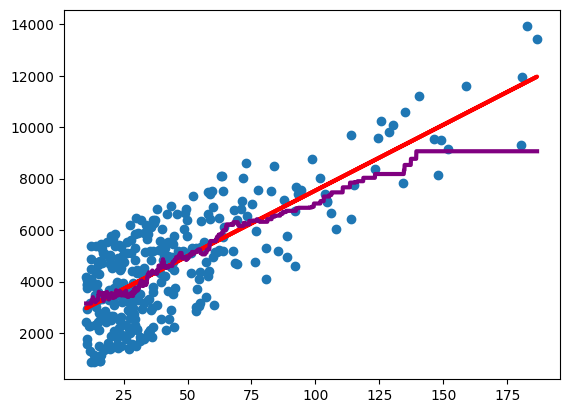

In [16]:
# Linear regression
lin_model = LinearRegression().fit(X_train, y_train)

# K-nearest-neighbor
k_model = KNeighborsRegressor(n_neighbors=30).fit(X_train, y_train)

x_plot_values = pd.DataFrame(np.linspace(X_train.min().iloc[0], X_train.max().iloc[0], 2000))

y_lin_pred = lin_model.predict(X_train)
y_k_pred = k_model.predict(x_plot_values)

plt.scatter(X_train, y_train, marker='o')
plt.plot(X_train, y_lin_pred, color='red',linewidth=3)
plt.plot(x_plot_values, y_k_pred, color="purple",linewidth=3)

It is difficult to decide which model is better. Hence we use **MSE** to quantify performance on the **testsing set**.

In [17]:
y_k_test_pred = k_model.predict(X_test)
y_lin_test_pred = lin_model.predict(X_test)

k_mse = mean_squared_error(y_test, y_k_test_pred)
lin_mse = mean_squared_error(y_test, y_lin_test_pred)

print("MSE of k-nearest neighbors is ", str(k_mse))
print("Linear regression has MSE of ", str(lin_mse))

print(lin_mse > k_mse)

MSE of k-nearest neighbors is  2263692.157416667
Linear regression has MSE of  2116453.0990219414
False


In this case linear regression outperforms k-nearest-neighbor, but what happens if change k?

In [18]:
y_k_test_pred = k_model.predict(X_test)

k_model_2 = KNeighborsRegressor(n_neighbors=20).fit(X_train,y_train)
y_k_test_pred = k_model_2.predict(X_test)
k_mse = mean_squared_error(y_test, y_k_test_pred)

print("MSE of k-nearest neighbors is ", str(k_mse))
print("Linear regression has MSE of ", str(lin_mse))

print(lin_mse > k_mse)

MSE of k-nearest neighbors is  2109885.63134375
Linear regression has MSE of  2116453.0990219414
True


In this case we see that k-nearest-neighbors performs better. However, how do we go about selecting parameter $k$? We will look at it in the next notebook.

# Conclusion
To test performance of the statistical model, we need to test its perfromance on the previously unseen data. To achieve this we, initially, split data into training and testing set. I have also introduced **MSE** a quantity to measure performance of the model. Lastly, I left with a question: how to select parameter $k$?